# MODULE 3 - Basis of Statistical Reasoning

## 3.1.1 Probability Example

> P(P) = (# of transactions where P was bought)/ n

In [75]:
import pandas as pd

In [23]:
# Suppose 'transactions' is a pandas DF, where each row is a transaction
# and there is a col named 'products' where it lists all the products in that
# transaction
transactions = pd.read_csv('example_files/transactions.csv')
print(transactions)

# Count total # of transactions
total_transactions = len(transactions)
print('Total transactions = ',total_transactions)

# Just out of curiosity to learn how to pick out elements of a DF
for i,j in transactions.iterrows():
    if 'P' in j['products']:
        print(i, j)


# Count # of transactions where P was bought
product_p_transactions = transactions['products'].apply(lambda x: 'P' in x).sum()
print('Product P transactions = ', product_p_transactions)

# Calculate probability
p_p = product_p_transactions / total_transactions
print('P(P) = ', p_p)

  products
0    A,B,P
1      C,D
2        P
3    A,P,D
4        E
5      B,C
6      P,E
7        A
8      D,P
Total transactions =  9
row:  0 products    A,B,P
Name: 0, dtype: object
row:  2 products    P
Name: 2, dtype: object
row:  3 products    A,P,D
Name: 3, dtype: object
row:  6 products    P,E
Name: 6, dtype: object
row:  8 products    D,P
Name: 8, dtype: object
Product P transactions =  5
P(P) =  0.5555555555555556


## 3.1.2.1 Sample Space

In [76]:
import numpy as np

In [33]:
ecommerce_data = pd.read_csv('example_files/ecommerce.csv')
print(ecommerce_data)

product_sample_space = ecommerce_data['product'].unique()
print(product_sample_space, '\n')

num_possible_outcomes = len(product_sample_space)
print('Number of possible outcomes = ', num_possible_outcomes, '\n')

amount_spent_sample_space = np.linspace(ecommerce_data['amount_spent'].min(), ecommerce_data['amount_spent'].max(), 1000)
# print('Amount spent space = ', amount_spent_sample_space)

length_of_sample_space = amount_spent_sample_space[-1] - amount_spent_sample_space[0]
print('Length of sample space = ', length_of_sample_space, '\n')

event_product_A = ecommerce_data[ecommerce_data['product'] == 'A']
print('Event product A\n', event_product_A, '\n')

event_spent_over_100 = ecommerce_data[ecommerce_data['amount_spent'] > 100]
print('Event spent over 100\n', event_spent_over_100)




  product  amount_spent
0       A           120
1       B            80
2       C           200
3       A            90
4       D           150
5       B            60
6       E           300
7       A           100
8       C            50
9       D           130
['A' 'B' 'C' 'D' 'E'] 

Number of possible outcomes =  5 

Length of sample space =  250.0 

Event product A
   product  amount_spent
0       A           120
3       A            90
7       A           100 

Event spent over 100
   product  amount_spent
0       A           120
2       C           200
4       D           150
6       E           300
9       D           130


## 3.2.1.3 Independent Events

P(A ^ B) = P(A) * P(B) if A and B are independent events

In [43]:
transaction_data = pd.read_csv('example_files/ecommerce.csv')
print(transaction_data,'\n')

transaction_data = transaction_data.drop(columns='amount_spent')
print('Dropped amount_spent col\n', transaction_data,'\n')

transaction_data['id'] = transaction_data.index
print('Added id col\n', transaction_data,'\n')

event_A = transaction_data[transaction_data['product'] == 'A']
print('Event A\n', event_A, '\n')

event_B = transaction_data[transaction_data['product'] == 'B']
print('Event B\n', event_B, '\n')

p_A = len(event_A)/len(transaction_data)
print('P(A) = ', p_A)

p_B = len(event_B)/len(transaction_data)
print('P(B) = ', p_B)

# Calculate P(A and B) using inner join on id
p_A_and_B = len(pd.merge(event_A, event_B, on='id'))/len(transaction_data)
print('P(A and B) = ', p_A_and_B)

if p_A_and_B == p_A * p_B:
    print('P(A) and P(B) are independent')
else:
    print('P(A) and P(B) are not independent')


  product  amount_spent
0       A           120
1       B            80
2       C           200
3       A            90
4       D           150
5       B            60
6       E           300
7       A           100
8       C            50
9       D           130 

Dropped amount_spent col
   product
0       A
1       B
2       C
3       A
4       D
5       B
6       E
7       A
8       C
9       D 

Added id col
   product  id
0       A   0
1       B   1
2       C   2
3       A   3
4       D   4
5       B   5
6       E   6
7       A   7
8       C   8
9       D   9 

Event A
   product  id
0       A   0
3       A   3
7       A   7 

Event B
   product  id
1       B   1
5       B   5 

P(A) =  0.3
P(B) =  0.2
P(A and B) =  0.0
P(A) and P(B) are not independent


## 3.3.2 Construction of a Probability Space


In [55]:
transaction_data = pd.read_csv('example_files/transactions_probability_space.csv')
print(transaction_data,'\n')

sample_space = transaction_data['itemset'].unique()
print(sample_space, '\n')

event_A = transaction_data[transaction_data['total'] > 100]
print('Event A\n', event_A, '\n')

event_B = transaction_data[transaction_data['itemset'].str.contains('Fruit-Vegetable')]
print('Event B\n', event_B, '\n')

p_A = len(event_A)/len(transaction_data)
print('P(A) = ', p_A)

p_B = len(event_B)/len(transaction_data)
print('P(B) = ', p_B)

           itemset  total
0       Milk-Bread     45
1            Fruit    120
2        Vegetable    110
3            Fruit     80
4        Meat-Eggs    130
5       Bread-Milk     95
6  Fruit-Vegetable    150
7        Milk-Eggs     40
8           Cereal     50
9  Fruit-Vegetable     90 

['Milk-Bread' 'Fruit' 'Vegetable' 'Meat-Eggs' 'Bread-Milk'
 'Fruit-Vegetable' 'Milk-Eggs' 'Cereal'] 

Event A
            itemset  total
1            Fruit    120
2        Vegetable    110
4        Meat-Eggs    130
6  Fruit-Vegetable    150 

Event B
            itemset  total
6  Fruit-Vegetable    150
9  Fruit-Vegetable     90 

P(A) =  0.4
P(B) =  0.2


## 3.4.1 Kolmogorov Axiom


In [56]:
# Define sample space for a 6-side fair die
sample_space = np.array([1,2,3,4,5,6])
print(sample_space, '\n')

# Compute the probability of each result
probabilities = np.full(6, 1/6)
print(probabilities, '\n')

# Axiom 1 - Non-negativity
assert np.all(probabilities >= 0)

# Axiom 2 - Normality
assert np.isclose(np.sum(probabilities), 1)

# Event A - Obtaining an even number
event_A = sample_space[sample_space % 2 == 0]
print('Event A\n', event_A, '\n')

# Event B - Obtaining an odd number
event_B = sample_space[sample_space % 2 != 0]
print('Event B\n', event_B, '\n')

# Axiom 3 - Countable additivity
assert np.isclose(
    np.sum(probabilities[event_A - 1]) + np.sum(probabilities[event_B - 1]), 1)





[1 2 3 4 5 6] 

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667] 

Event A
 [2 4 6] 

Event B
 [1 3 5] 



## 3.4.2 Properties and Theorems

### Complement Property
$ P(A^c) = 1 - P(A) $

### Total Probability Theorem
$ P(B) = \sum_{i=1}^n [P(B|A_i) * P(A_i)] $
<br>
$ P(A) = P(A|B)*P(B) + P(A|\sim B)*P(\sim B) $

### Conditional Probability Theorem
$P(A|B) = \frac{P(A \cap B)}{P(B)}$ if P(B) > 0

In [66]:
# Generate random sales data
sales_data = np.random.choice([0,1], size=10000, p=[0.7, 0.3])
# print(sales_data, '\n')

# This turns the array into a boolean array where 0s are False and 1s are True
event_A = (sales_data == 1)
print('Event A\n', event_A, '\n')

event_B = np.random.choice([0,1], size=10000, p=[0.5,0.5])
event_B = event_B.astype(bool)


# Compute probabilities of events A and B, we use .mean in this case
# because the mean is the probability since we are adding 0s and 1s
P_A = np.mean(event_A)
print('P(A) = ', P_A)
print('P(~A) = ', np.mean(~event_A))

P_B = np.mean(event_B)
print('P(B) = ', P_B)
print('P(~B) = ', np.mean(~event_B))

P_A_given_B = np.mean(event_A[event_B])
print('P(A|B) = ', P_A_given_B)

P_A_given_notB = np.mean(event_A[~event_B])
print('P(A|~B) = ', P_A_given_notB)

# Compute the probability of intersection
# It checks if event_A[i] == event_B[i]
P_A_and_B = np.mean(event_A & event_B)
print('P(A and B) = ', P_A_and_B)

# Assert complementarity property
assert np.isclose(1 - P_A, np.mean(~event_A))
assert np.isclose(1 - P_B, np.mean(~event_B))
print('Complementarity property respected')

# Assert Total Probability Theorem
assert np.isclose( P_A, P_A_given_B*P_B + P_A_given_notB*(1-P_B) )
print('Law of Total Probability Successfully asserted!')

# Assert Conditional Probability Theorem
assert np.isclose(P_A_and_B/P_B , np.mean(event_A[event_B]))
print('Conditional Probability Theorem y Successfully asserted!')


Event A
 [ True False False ...  True  True  True] 

P(A) =  0.2934
P(~A) =  0.7066
P(B) =  0.4982
P(~B) =  0.5018
P(A|B) =  0.2958651144118828
P(A|~B) =  0.2909525707453169
P(A and B) =  0.1474
Complementarity property respected
Law of Total Probability Successfully asserted!
Conditional Probability Theorem y Successfully asserted!


In [68]:
%who

P_A	 P_A_and_B	 P_A_given_B	 P_A_given_notB	 P_B	 amount_spent_sample_space	 ecommerce_data	 event_A	 event_B	 
event_b	 event_product_A	 event_spent_over_100	 i	 j	 length_of_sample_space	 np	 num_possible_outcomes	 p_A	 
p_A_and_B	 p_B	 p_p	 pd	 probabilities	 product_p_transactions	 product_sample_space	 products_list	 pydev_jupyter_vars	 
remove_imported_pydev_package	 sales_data	 sample_space	 sys	 total_transactions	 transaction	 transaction_data	 transactions	 


In [69]:
for var in [
    "P_A", "P_A_and_B", "P_A_given_B", "P_A_given_notB", "P_B", "amount_spent_sample_space",
    "ecommerce_data", "event_A", "event_B", "event_b", "event_product_A",
    "event_spent_over_100", "i", "j", "length_of_sample_space", "np",
    "num_possible_outcomes", "p_A", "p_A_and_B", "p_B", "p_p", "pd",
    "probabilities", "product_p_transactions", "product_sample_space",
    "products_list", "pydev_jupyter_vars", "remove_imported_pydev_package",
    "sales_data", "sample_space", "sys", "total_transactions", "transaction",
    "transaction_data", "transactions"
]:
    globals().pop(var, None)


In [70]:
%who

pydev_jupyter_vars	 remove_imported_pydev_package	 sys	 var	 


## 3.5.1 Product Rule and Bayes Theorem

### Product Rule
Determines the joint probability of 2 events<br>
$ P(A , B) = P(A \cap B) = P(A)*P(B|A) = P(B)*P(A|B) $

### Bayes Theorem
$ P(A|B) = P(B|A)*\frac{P(A)}{P(B)} $

In [92]:
# Generate random data for events A and B
event_A = np.random.choice([0,1], size=10000, p=[0.9, 0.1])
event_B = np.random.choice([0,1], size=10000, p=[0.95, 0.05])

# Compute probabilities for each
P_A = np.mean(event_A)
print('P(A) = ', P_A)

P_B = np.mean(event_B)
print('P(B) = ', P_B)

# Compute P(A and B), P(A|B) and P(B|A) using product rule
P_A_and_B = np.mean(event_A & event_B)
assert np.isclose(P_A_and_B, np.mean(event_A*event_B))
print('P(A and B) = ', P_A_and_B)

P_A_given_B = P_A_and_B/P_B
assert np.isclose(P_A_given_B, np.mean(event_A[event_B.astype(bool)]))
print('P(A|B) = ', P_A_given_B, np.mean(event_A[event_B.astype(bool)]))

P_B_given_A = P_A_and_B/P_A
assert np.isclose(P_B_given_A, np.mean(event_B[event_A.astype(bool)]))
print('P(B|A) = ', P_B_given_A, np.mean(event_B[event_A.astype(bool)]))

# Verify Product Rule
assert np.isclose(P_A_and_B, P_A * P_B_given_A)
assert np.isclose(P_A_and_B, P_B * P_A_given_B)
print('Product Rule successfully asserted!')

# Verify Bayes Theorem
assert np.isclose(P_A_given_B, P_B_given_A * P_A / P_B)
print('Bayes Theorem successfully asserted!')



P(A) =  0.1032
P(B) =  0.0482
P(A and B) =  0.0054
P(A|B) =  0.11203319502074689 0.11203319502074689
P(B|A) =  0.05232558139534884 0.05232558139534884
Product Rule successfully asserted!
Bayes Theorem successfully asserted!


## 3.6.1.1 Cumulative Distribution Function
$F(x) = P(X ≤ x)$

In [93]:
import matplotlib.pyplot as plt
import random

[10, 1, 18, 21, 25, 21, 7, 20, 24, 25, 22, 20, 15, 22, 19, 14, 19, 23, 16, 10, 12, 4, 22, 19, 17, 2, 3, 14, 15, 1, 6, 25, 22, 22, 1, 11, 6, 20, 5, 17, 4, 25, 4, 21, 1, 19, 8, 6, 3, 6, 11, 19, 24, 25, 11, 7, 17, 22, 24, 14, 9, 8, 13, 1, 4, 5, 4, 7, 23, 24, 4, 24, 24, 15, 21, 23, 24, 2, 9, 3, 15, 24, 3, 15, 19, 6, 11, 15, 14, 21, 13, 3, 8, 6, 15, 9, 4, 9, 24, 23]
[1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 10, 10, 11, 11, 11, 11, 12, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 16, 17, 17, 17, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25]
[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.5

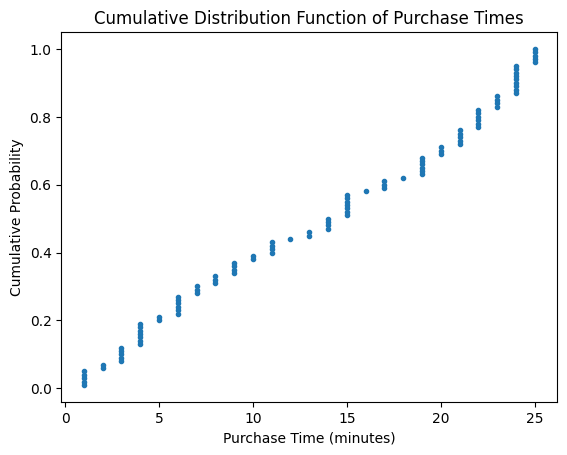

In [99]:
purchase_times = [random.randint(1,25) for _ in range(100)]
print(purchase_times)

purchase_times.sort()
print(purchase_times)

# Create list of cumulative properties from 1/N to 1
probabilities = np.arange(1, len(purchase_times)+1) /len(purchase_times)
print(probabilities)

# Create graph
plt.plot(purchase_times, probabilities, marker='.' ,linestyle='none')

# Set up tags and title
plt.title('Cumulative Distribution Function of Purchase Times')
plt.xlabel('Purchase Time (minutes)')
plt.ylabel('Cumulative Probability')

plt.show()

## 3.6.1.2 Density Function


In [101]:
from scipy.stats import norm

Mean = 179.866 
Deviation =  17.330379222625222

 [150.         150.60606061 151.21212121 151.81818182 152.42424242
 153.03030303 153.63636364 154.24242424 154.84848485 155.45454545
 156.06060606 156.66666667 157.27272727 157.87878788 158.48484848
 159.09090909 159.6969697  160.3030303  160.90909091 161.51515152
 162.12121212 162.72727273 163.33333333 163.93939394 164.54545455
 165.15151515 165.75757576 166.36363636 166.96969697 167.57575758
 168.18181818 168.78787879 169.39393939 170.         170.60606061
 171.21212121 171.81818182 172.42424242 173.03030303 173.63636364
 174.24242424 174.84848485 175.45454545 176.06060606 176.66666667
 177.27272727 177.87878788 178.48484848 179.09090909 179.6969697
 180.3030303  180.90909091 181.51515152 182.12121212 182.72727273
 183.33333333 183.93939394 184.54545455 185.15151515 185.75757576
 186.36363636 186.96969697 187.57575758 188.18181818 188.78787879
 189.39393939 190.         190.60606061 191.21212121 191.81818182
 192.42424242 193.03030303 

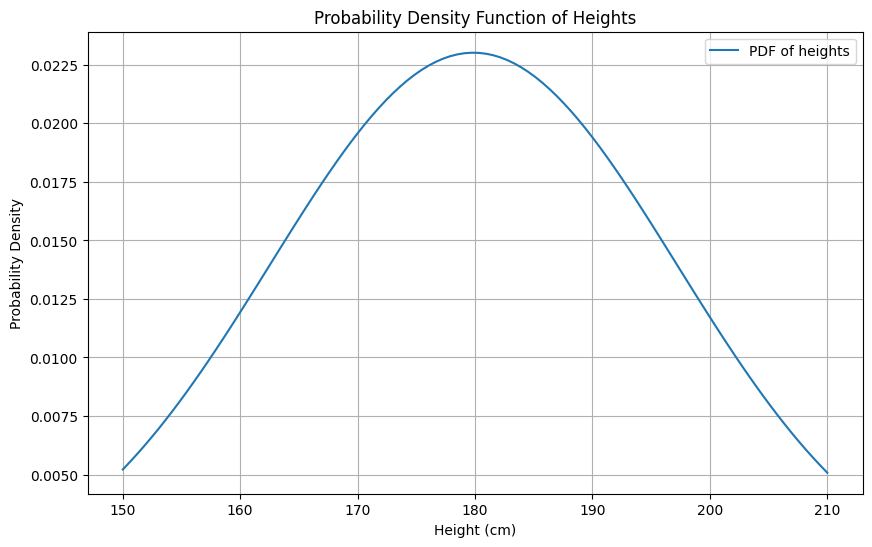

In [108]:
# Heights in cm
heights = [random.randint(150,210) for _ in range(1000)]

mean, deviation = np.mean(heights), np.std(heights)
print('Mean =',mean, '\nDeviation = ', deviation)

# Create a range to evaluate the range of height values for the PDF
values = np.linspace(min(heights), max(heights), 100)
print('\n', values)

# Evaluate PDF in the given values
densities = norm.pdf(values, mean, deviation)
print('\n', densities)

# Create PDF graph
plt.figure(figsize=(10,6))
plt.plot(values, densities, label='PDF of heights')

# Add graph details
plt.title('Probability Density Function of Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

plt.show()